## In This project we have reviews of different movie in which we categorize the positive and negative reviews

# import Libraries


In [88]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

### Read the data 

In [89]:
data= pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


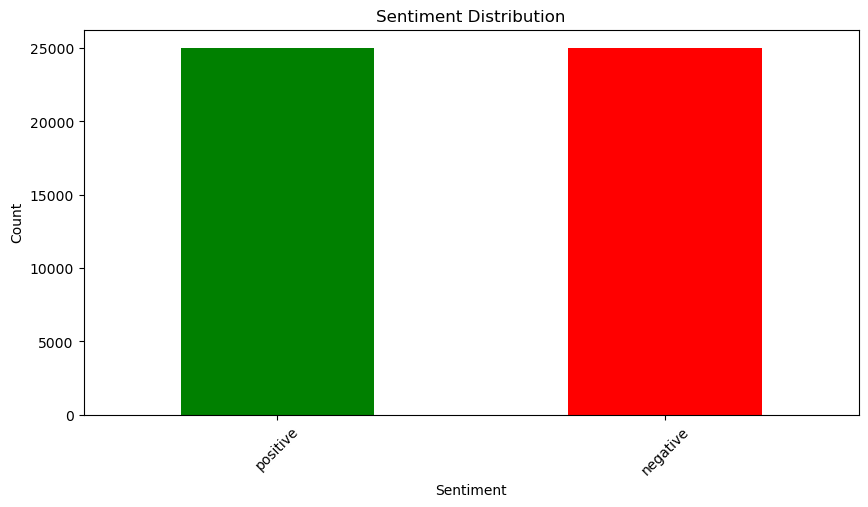

In [90]:
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='sentiment'>

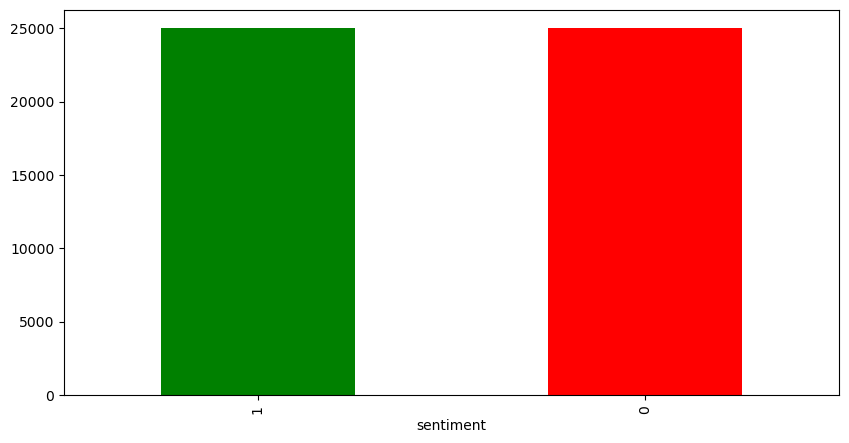

In [91]:
data['sentiment']= data['sentiment'].map({'positive':1, 'negative':0})
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'] ,figsize=(10, 5))

# data Cleaning and normalization

In [92]:
import re
def clean_text(text):
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # remove special characters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

data['cleaned_review'] = data['review'].apply(clean_text)
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,Petter Matteis Love in the Time of Money is a ...


### covert data to lower case

In [93]:
# normalize text convert to lowercase
data['cleaned_review'] = data['cleaned_review'].str.lower()
data.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love in the time of money is a ...


## Tokenization

In [94]:
# Tokenization
from nltk.tokenize import word_tokenize
data['tokens']=data['cleaned_review'].apply(word_tokenize)



In [95]:
pip install wordsegment

Note: you may need to restart the kernel to use updated packages.


In [96]:
# Token segmentation 
from nltk.tokenize import word_tokenize
from wordsegment import load,segment
load()

In [97]:
def segment_tokens(tokens):
    result=[]
    for token in tokens:
        parts=segment(token)
        if len(parts)>1:
            result.extend(parts)
        else:
            result.append(token)
    return result

In [98]:
# data['segmented_tokens']=data['tokens'].apply(segment_tokens)

## Resample data and set a smaller dataset with level sentiments

In [99]:
# Resample data and set a smaller dataset with level sentiments
data=data.sample(n=1000, random_state=42).reset_index(drop=True)
data['sentiment'].value_counts()


sentiment
0    524
1    476
Name: count, dtype: int64

# stopword removal , stemming and lemmatization


In [100]:
# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):  
    return[word for word in tokens if word not in stop_words]

data['segmented_tokens']=data['tokens'].apply(segment_tokens)
data['cleaned_tokens'] = data['segmented_tokens'].apply(remove_stopwords)
data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksab2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,cleaned_review,tokens,segmented_tokens,cleaned_tokens
0,I really liked this Summerslam due to the look...,1,i really liked this summerslam due to the look...,"[i, really, liked, this, summerslam, due, to, ...","[i, really, liked, this, summerslam, due, to, ...","[really, liked, summerslam, due, look, arena, ..."
1,Not many television shows appeal to quite as m...,1,not many television shows appeal to quite as m...,"[not, many, television, shows, appeal, to, qui...","[not, many, television, shows, appeal, to, qui...","[many, television, shows, appeal, quite, many,..."
2,The film quickly gets to a major chase scene w...,0,the film quickly gets to a major chase scene w...,"[the, film, quickly, gets, to, a, major, chase...","[the, film, quickly, gets, to, a, major, chase...","[film, quickly, gets, major, chase, scene, eve..."
3,Jane Austen would definitely approve of this o...,1,jane austen would definitely approve of this o...,"[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, one..."
4,Expectations were somewhat high for me when I ...,0,expectations were somewhat high for me when i ...,"[expectations, were, somewhat, high, for, me, ...","[expectations, were, somewhat, high, for, me, ...","[expectations, somewhat, high, went, see, movi..."
...,...,...,...,...,...,...
995,I don't think I've ever been so bowled over by...,0,i dont think ive ever been so bowled over by t...,"[i, dont, think, ive, ever, been, so, bowled, ...","[i, dont, think, ive, ever, been, so, bowled, ...","[dont, think, ive, ever, bowled, sheer, absurd..."
996,"This movie was extremely disappointing, I thou...",0,this movie was extremely disappointing i thoug...,"[this, movie, was, extremely, disappointing, i...","[this, movie, was, extremely, disappointing, i...","[movie, extremely, disappointing, thought, wou..."
997,Mobile Suit Gundam Wing is the Fourth series i...,1,mobile suit gundam wing is the fourth series i...,"[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, fourth, series, c..."
998,"We toss around the term ""superstar"" way too li...",1,we toss around the term superstar way too ligh...,"[we, toss, around, the, term, superstar, way, ...","[we, toss, around, the, term, superstar, way, ...","[toss, around, term, superstar, way, lightly, ..."


# stemming And Lemmatization

In [101]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ksab2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [102]:
# stemming
stemmer = PorterStemmer()
data['stem']=[[stemmer.stem(word) for word in token]
              for token in data['cleaned_tokens']]
# lemmatization
lemmatizer = WordNetLemmatizer()
data['lemmatized'] = [[lemmatizer.lemmatize(word,pos='v') for word in tokens] 
                      for tokens in data['cleaned_tokens']]

data

,review,sentiment,cleaned_review,tokens,segmented_tokens,cleaned_tokens,stem,lemmatized
0,I really liked this Summerslam due to the look...,1,i really liked this summerslam due to the look...,"[i, really, liked, this, summerslam, due, to, ...","[i, really, liked, this, summerslam, due, to, ...","[really, liked, summerslam, due, look, arena, ...","[realli, like, summerslam, due, look, arena, c...","[really, like, summerslam, due, look, arena, c..."
1,Not many television shows appeal to quite as m...,1,not many television shows appeal to quite as m...,"[not, many, television, shows, appeal, to, qui...","[not, many, television, shows, appeal, to, qui...","[many, television, shows, appeal, quite, many,...","[mani, televis, show, appeal, quit, mani, diff...","[many, television, show, appeal, quite, many, ..."
2,The film quickly gets to a major chase scene w...,0,the film quickly gets to a major chase scene w...,"[the, film, quickly, gets, to, a, major, chase...","[the, film, quickly, gets, to, a, major, chase...","[film, quickly, gets, major, chase, scene, eve...","[film, quickli, get, major, chase, scene, ever...","[film, quickly, get, major, chase, scene, ever..."
3,Jane Austen would definitely approve of this o...,1,jane austen would definitely approve of this o...,"[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, one...","[jane, austen, would, definit, approv, one, gw...","[jane, austen, would, definitely, approve, one..."
4,Expectations were somewhat high for me when I ...,0,expectations were somewhat high for me when i ...,"[expectations, were, somewhat, high, for, me, ...","[expectations, were, somewhat, high, for, me, ...","[expectations, somewhat, high, went, see, movi...","[expect, somewhat, high, went, see, movi, thou...","[expectations, somewhat, high, go, see, movie,..."
...,...,...,...,...,...,...,...,...
995,I don't think I've ever been so bowled over by...,0,i dont think ive ever been so bowled over by t...,"[i, dont, think, ive, ever, been, so, bowled, ...","[i, dont, think, ive, ever, been, so, bowled, ...","[dont, think, ive, ever, bowled, sheer, absurd...","[dont, think, ive, ever, bowl, sheer, absurd, ...","[dont, think, ive, ever, bowl, sheer, absurdit..."
996,"This movie was extremely disappointing, I thou...",0,this movie was extremely disappointing i thoug...,"[this, movie, was, extremely, disappointing, i...","[this, movie, was, extremely, disappointing, i...","[movie, extremely, disappointing, thought, wou...","[movi, extrem, disappoint, thought, would, ano...","[movie, extremely, disappoint, think, would, a..."
997,Mobile Suit Gundam Wing is the Fourth series i...,1,mobile suit gundam wing is the fourth series i...,"[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, fourth, series, c...","[mobil, suit, gundam, wing, fourth, seri, cont...","[mobile, suit, gundam, wing, fourth, series, c..."
998,"We toss around the term ""superstar"" way too li...",1,we toss around the term superstar way too ligh...,"[we, toss, around, the, term, superstar, way, ...","[we, toss, around, the, term, superstar, way, ...","[toss, around, term, superstar, way, lightly, ...","[toss, around, term, superstar, way, lightli, ...","[toss, around, term, superstar, way, lightly, ..."


In [104]:
data['processed_review'] = data['lemmatized'].apply(lambda x: ' '.join(x))
data

,review,sentiment,cleaned_review,tokens,segmented_tokens,cleaned_tokens,stem,lemmatized,processed_review
0,I really liked this Summerslam due to the look...,1,i really liked this summerslam due to the look...,"[i, really, liked, this, summerslam, due, to, ...","[i, really, liked, this, summerslam, due, to, ...","[really, liked, summerslam, due, look, arena, ...","[realli, like, summerslam, due, look, arena, c...","[really, like, summerslam, due, look, arena, c...",really like summerslam due look arena curtain ...
1,Not many television shows appeal to quite as m...,1,not many television shows appeal to quite as m...,"[not, many, television, shows, appeal, to, qui...","[not, many, television, shows, appeal, to, qui...","[many, television, shows, appeal, quite, many,...","[mani, televis, show, appeal, quit, mani, diff...","[many, television, show, appeal, quite, many, ...",many television show appeal quite many differe...
2,The film quickly gets to a major chase scene w...,0,the film quickly gets to a major chase scene w...,"[the, film, quickly, gets, to, a, major, chase...","[the, film, quickly, gets, to, a, major, chase...","[film, quickly, gets, major, chase, scene, eve...","[film, quickli, get, major, chase, scene, ever...","[film, quickly, get, major, chase, scene, ever...",film quickly get major chase scene ever increa...
3,Jane Austen would definitely approve of this o...,1,jane austen would definitely approve of this o...,"[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, of,...","[jane, austen, would, definitely, approve, one...","[jane, austen, would, definit, approv, one, gw...","[jane, austen, would, definitely, approve, one...",jane austen would definitely approve one gwyne...
4,Expectations were somewhat high for me when I ...,0,expectations were somewhat high for me when i ...,"[expectations, were, somewhat, high, for, me, ...","[expectations, were, somewhat, high, for, me, ...","[expectations, somewhat, high, went, see, movi...","[expect, somewhat, high, went, see, movi, thou...","[expectations, somewhat, high, go, see, movie,...",expectations somewhat high go see movie think ...
...,...,...,...,...,...,...,...,...,...
995,I don't think I've ever been so bowled over by...,0,i dont think ive ever been so bowled over by t...,"[i, dont, think, ive, ever, been, so, bowled, ...","[i, dont, think, ive, ever, been, so, bowled, ...","[dont, think, ive, ever, bowled, sheer, absurd...","[dont, think, ive, ever, bowl, sheer, absurd, ...","[dont, think, ive, ever, bowl, sheer, absurdit...",dont think ive ever bowl sheer absurdity movie...
996,"This movie was extremely disappointing, I thou...",0,this movie was extremely disappointing i thoug...,"[this, movie, was, extremely, disappointing, i...","[this, movie, was, extremely, disappointing, i...","[movie, extremely, disappointing, thought, wou...","[movi, extrem, disappoint, thought, would, ano...","[movie, extremely, disappoint, think, would, a...",movie extremely disappoint think would another...
997,Mobile Suit Gundam Wing is the Fourth series i...,1,mobile suit gundam wing is the fourth series i...,"[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, is, the, fourth, ...","[mobile, suit, gundam, wing, fourth, series, c...","[mobil, suit, gundam, wing, fourth, seri, cont...","[mobile, suit, gundam, wing, fourth, series, c...",mobile suit gundam wing fourth series continue...
998,"We toss around the term ""superstar"" way too li...",1,we toss around the term superstar way too ligh...,"[we, toss, around, the, term, superstar, way, ...","[we, toss, around, the, term, superstar, way, ...","[toss, around, term, superstar, way, lightly, ...","[toss, around, term, superstar, way, lightli, ...","[toss, around, term, superstar, way, lightly, ...",toss around term superstar way lightly days he...


## extract Feature using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
x_train_tfidf = tfidf_vect.fit_transform(data['processed_review'])
print(f"Shape of X_train{x_train_tfidf.shape}")

Shape of X_train(1000, 15031)


In [106]:
y=data['sentiment']

# Train and test the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [109]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (800, 15031)
Shape of x_test: (200, 15031)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:,1]


[0.45071478 0.36352699 0.62159162 0.31854069 0.55170391 0.66589109
 0.45954589 0.432484   0.2602952  0.24863445]


In [116]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,precision_recall_curve,precision_score, recall_score, f1_score
acc=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8050
Precision: 0.8256
Recall: 0.7474
F1 Score: 0.7845
ROC AUC: 0.8973


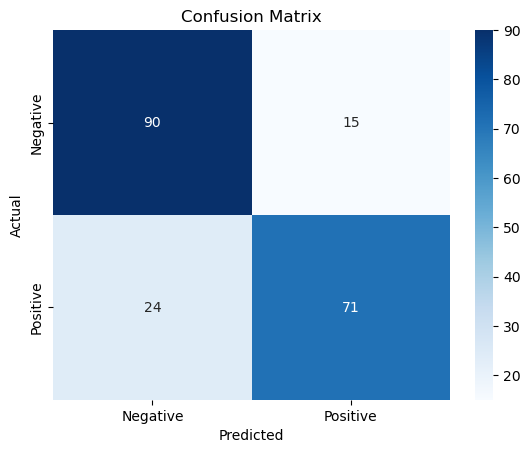

In [121]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar="True", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

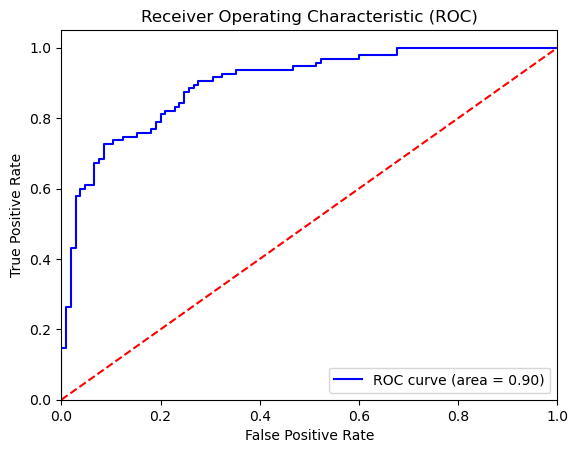

In [124]:
# Plot ROC_auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [128]:
from wordcloud import WordCloud

all_text = ' '.join(data['processed_review'])
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png') # Save instead of show for compatibility


ModuleNotFoundError: No module named 'wordcloud'